# MNIST 손글씨 숫자 데이터셋을 이용한 DNN(Deep Neural Network) 분류 모델

## import Libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## 데이터 불러오기 및 전처리

In [11]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 손글씨 이미지(28x28 픽셀)와 정답(0~9 숫자)을 가져옴.

# 데이터 크기 출력
print("훈련 이미지 Shape:", x_train.shape)  
print("테스트 이미지 Shape:", x_test.shape)   
print("훈련 라벨 Shape:", y_train.shape)    
print("테스트 라벨 Shape:", y_test.shape)

# 픽셀값(0~255)을 0~1 사이로 정규화.
x_train, x_test = x_train / 255.0, x_test / 255.0

# 레이블을 one-hot 인코딩하여 분류에 적합하게 만듦.
y_train_cat = to_categorical(y_train, 10) # 10은 클래스의 개수(0~9)
y_test_cat = to_categorical(y_test, 10)

훈련 이미지 Shape: (60000, 28, 28)
테스트 이미지 Shape: (10000, 28, 28)
훈련 라벨 Shape: (60000,)
테스트 라벨 Shape: (10000,)


## 모델 정의/학습/검증

In [14]:
# 모델 정의
model = Sequential([
    Flatten(input_shape=(28, 28)), # 입력층: 28x28 픽셀의 2D 이미지를 신경망에 넣기 위해 1차원(784차원) 벡터로 변환.
    # 이미지나 다차원 데이터를 Dense(완전연결층)에 넣기 위해서는 Flatten 함수를 이용하여 입력을 1차원으로 만들어야 한다.
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # 다중 분류이므로 softmax 사용, 0~9 10가지를 분류하는 것이므로 출력층의 뉴런의 개수는 10으로 설정.
])

# 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # 다중 분류용 손실함수
              metrics=['accuracy'])

# 학습 (히스토리 저장)
history = model.fit(
    x_train, y_train_cat,
    validation_split = 0.1, # 학습 데이터 중 10%를 검증용으로 사용
    epochs = 5,
    batch_size = 32,
    verbose = 1
)

# 평가
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {acc:.4f}")

# 예측
preds = model.predict(x_test)
pred_labels = np.argmax(preds, axis = 1)

Epoch 1/5


C:\Users\plo55\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.4566 - val_accuracy: 0.9613 - val_loss: 0.1309
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9649 - loss: 0.1136 - val_accuracy: 0.9747 - val_loss: 0.0860
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0744 - val_accuracy: 0.9712 - val_loss: 0.1033
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9833 - loss: 0.0520 - val_accuracy: 0.9778 - val_loss: 0.0794
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0396 - val_accuracy: 0.9743 - val_loss: 0.0888
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9719 - loss: 0.0902
Test Accuracy: 0.9762
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


## 검증 시각화

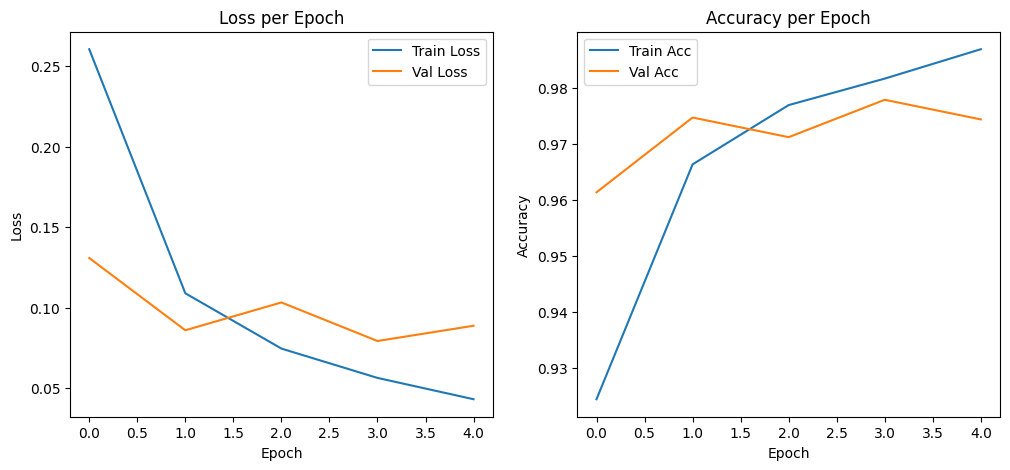

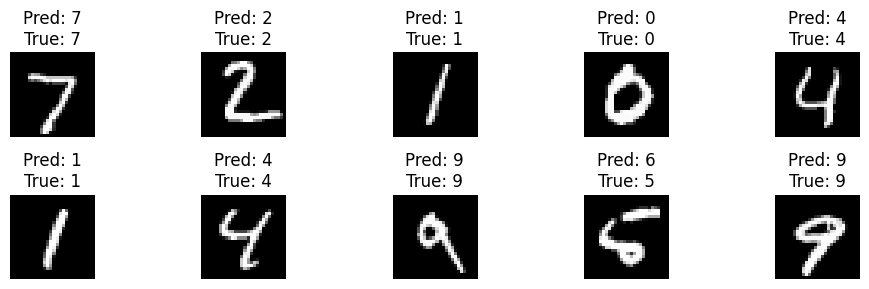

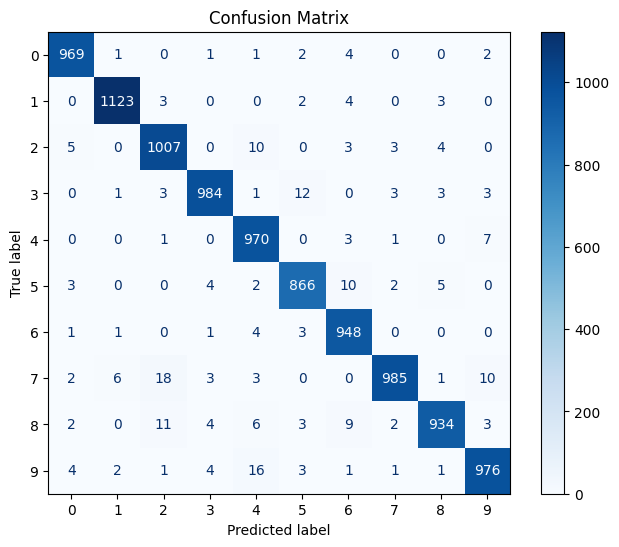

              precision    recall  f1-score   support

           0     0.9828    0.9888    0.9858       980
           1     0.9903    0.9894    0.9899      1135
           2     0.9646    0.9758    0.9701      1032
           3     0.9830    0.9743    0.9786      1010
           4     0.9576    0.9878    0.9724       982
           5     0.9719    0.9709    0.9714       892
           6     0.9654    0.9896    0.9773       958
           7     0.9880    0.9582    0.9728      1028
           8     0.9821    0.9589    0.9704       974
           9     0.9750    0.9673    0.9711      1009

    accuracy                         0.9762     10000
   macro avg     0.9761    0.9761    0.9760     10000
weighted avg     0.9764    0.9762    0.9762     10000



In [17]:
# 학습 곡선 시각화
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Acc')
plt.plot(history.history['val_accuracy'], label = 'Val Acc')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# 이미지 10개 시각화
plt.figure(figsize = (10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap = 'gray')
    plt.title(f"Pred: {pred_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# 혼동 행렬 생성
cm = confusion_matrix(y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

# 시각화
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 정밀도, 재현율, F1-score 출력
print(classification_report(y_test, pred_labels, digits=4))